In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve,  precision_recall_curve, auc

In [8]:
df = pd.read_csv("results/score.csv")
df

,label,img_distance,anomaly_score,z_distance
0,5,0.003345,0.004448,0.005353
1,5,0.003279,0.004689,0.006735
2,5,0.003084,0.004238,0.019216
3,5,0.003849,0.004802,0.021394
4,5,0.002957,0.005190,0.009438
...,...,...,...,...
146,3,0.004941,0.006084,0.046723
147,3,0.003382,0.004522,0.018303
148,3,0.004398,0.006085,0.013630
149,3,0.003634,0.005534,0.009944


In [9]:
trainig_label = 0
labels = np.where(df["label"].values == trainig_label, 0, 1)
anomaly_score = df["anomaly_score"].values
img_distance = df["img_distance"].values
z_distance = df["z_distance"].values

In [12]:
fpr, tpr, _ = roc_curve(labels, img_distance)
precision, recall, _ = precision_recall_curve(labels, anomaly_score)
roc_auc = auc(fpr, tpr)
pr_auc =  auc(recall, precision)

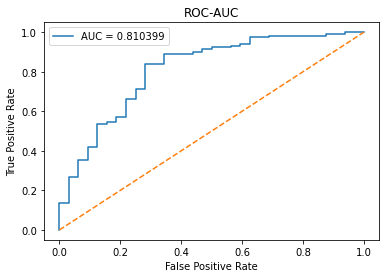

In [13]:
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC-AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

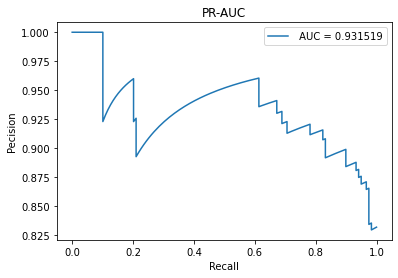

In [14]:
plt.plot(recall, precision, label=f" AUC = {pr_auc:3f}")
plt.title("PR-AUC")
plt.xlabel("Recall")
plt.ylabel("Pecision")
plt.legend()
plt.show()

In [15]:
mvtec_dict = {'fpr': fpr ,'tpr':tpr}

In [21]:
df = pd.read_csv("results/score_mnist.csv")
df

,label,img_distance,anomaly_score,z_distance
0,8,0.184299,0.354620,0.010346
1,8,0.287613,0.663936,0.118346
2,8,0.129002,0.161997,0.018700
3,8,0.163424,0.234886,0.046786
4,8,0.211301,0.309707,0.023272
...,...,...,...,...
65315,2,0.398235,1.224788,0.048210
65316,3,0.343631,0.463914,0.318012
65317,4,0.238426,0.464621,0.133954
65318,5,0.299351,0.544842,0.067665


In [22]:
trainig_label = 8
labels = np.where(df["label"].values == trainig_label, 0, 1)
anomaly_score = df["anomaly_score"].values
img_distance = df["img_distance"].values
z_distance = df["z_distance"].values
fpr, tpr, _ = roc_curve(labels, img_distance)
precision, recall, _ = precision_recall_curve(labels, anomaly_score)
roc_auc = auc(fpr, tpr)
pr_auc =  auc(recall, precision)

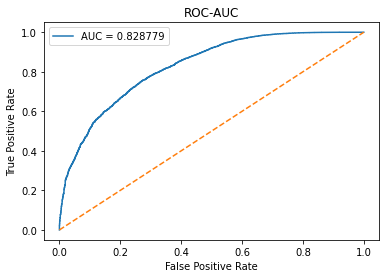

In [23]:
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC-AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

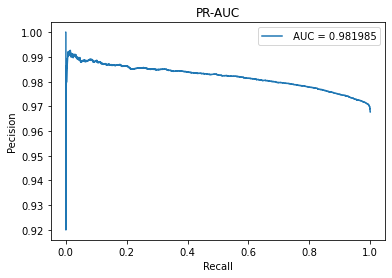

In [24]:
plt.plot(recall, precision, label=f" AUC = {pr_auc:3f}")
plt.title("PR-AUC")
plt.xlabel("Recall")
plt.ylabel("Pecision")
plt.legend()
plt.show()

In [25]:
mnist_dict = {'fpr': fpr ,'tpr':tpr}

In [27]:
results_dict = {'mnist': mnist_dict, 'mvtec':mvtec_dict}

In [28]:
import pickle
with open('roc_results_f_anogan.pkl', 'wb')as f:
    pickle.dump(results_dict, f)

In [29]:
with open('roc_results_f_anogan.pkl', 'rb')as f:
    dct = pickle.load(f)

In [30]:
dct

{'mnist': {'fpr': array([0.        , 0.        , 0.        , ..., 0.96829837, 0.96829837,
         1.        ]),
  'tpr': array([0.00000000e+00, 1.58290463e-05, 1.49742778e-02, ...,
         9.99984171e-01, 1.00000000e+00, 1.00000000e+00])},
 'mvtec': {'fpr': array([0.     , 0.     , 0.     , 0.03125, 0.03125, 0.0625 , 0.0625 ,
         0.09375, 0.09375, 0.125  , 0.125  , 0.15625, 0.15625, 0.1875 ,
         0.1875 , 0.21875, 0.21875, 0.25   , 0.25   , 0.28125, 0.28125,
         0.34375, 0.34375, 0.4375 , 0.4375 , 0.46875, 0.46875, 0.5    ,
         0.5    , 0.5625 , 0.5625 , 0.59375, 0.59375, 0.625  , 0.625  ,
         0.6875 , 0.6875 , 0.875  , 0.875  , 0.9375 , 0.9375 , 1.     ]),
  'tpr': array([0.        , 0.00840336, 0.13445378, 0.13445378, 0.26890756,
         0.26890756, 0.35294118, 0.35294118, 0.42016807, 0.42016807,
         0.53781513, 0.53781513, 0.54621849, 0.54621849, 0.57142857,
         0.57142857, 0.66386555, 0.66386555, 0.71428571, 0.71428571,
         0.84033613, 0.84